In [1]:
install.packages('gsheet')
library(tidyverse)
library(cowplot)
library(scales)
library(gsheet)
library(repr)
data <- gsheet2tbl('docs.google.com/spreadsheets/d/1MhyB5hxvmZCIAMTbdSscGI4yIUbM2Au_Hkdkx9dx_LM/edit?usp=sharing')


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
head(data,6)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


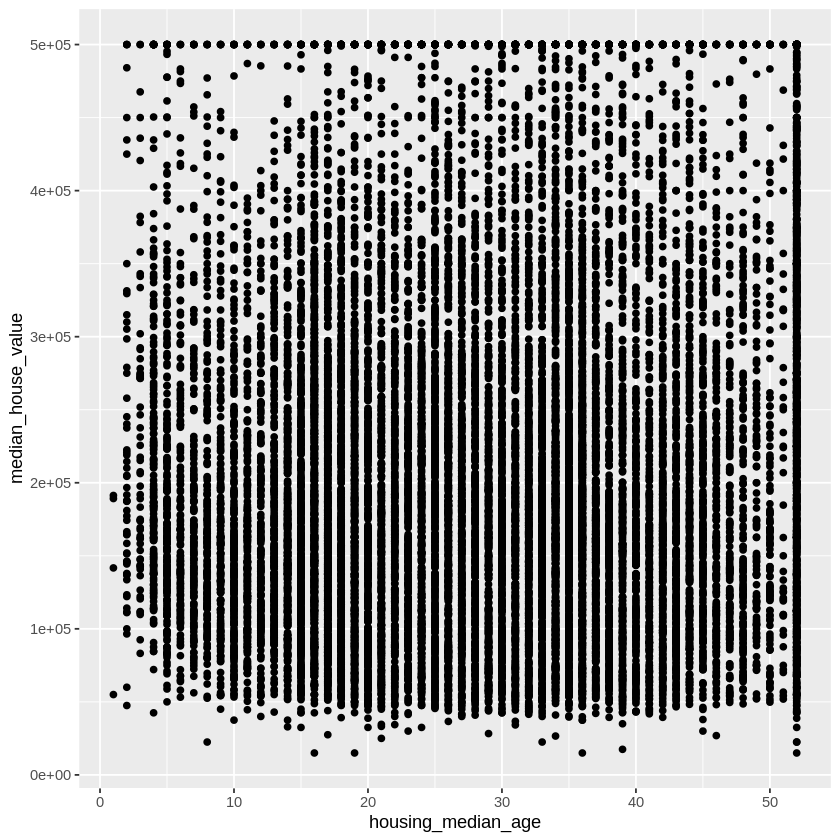

In [3]:
age_vs_value_plot <- ggplot(data,aes(x=housing_median_age,y=median_house_value)) +
    geom_point()
age_vs_value_plot

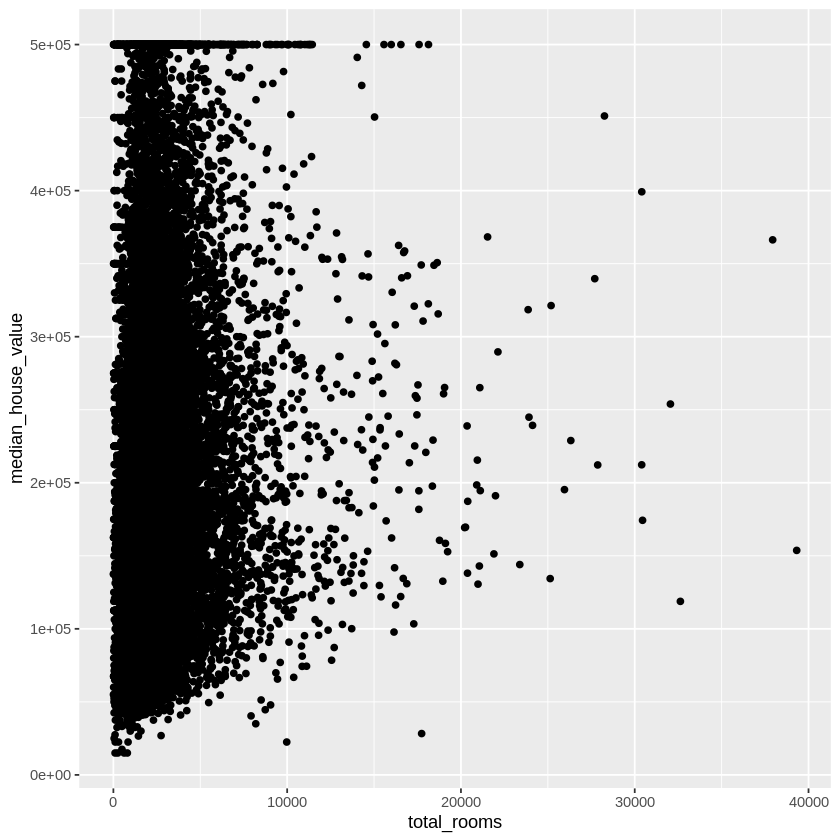

In [4]:
age_vs_space_plot <- ggplot(data,aes(x=total_rooms,y=median_house_value)) +
    geom_point()
age_vs_space_plot

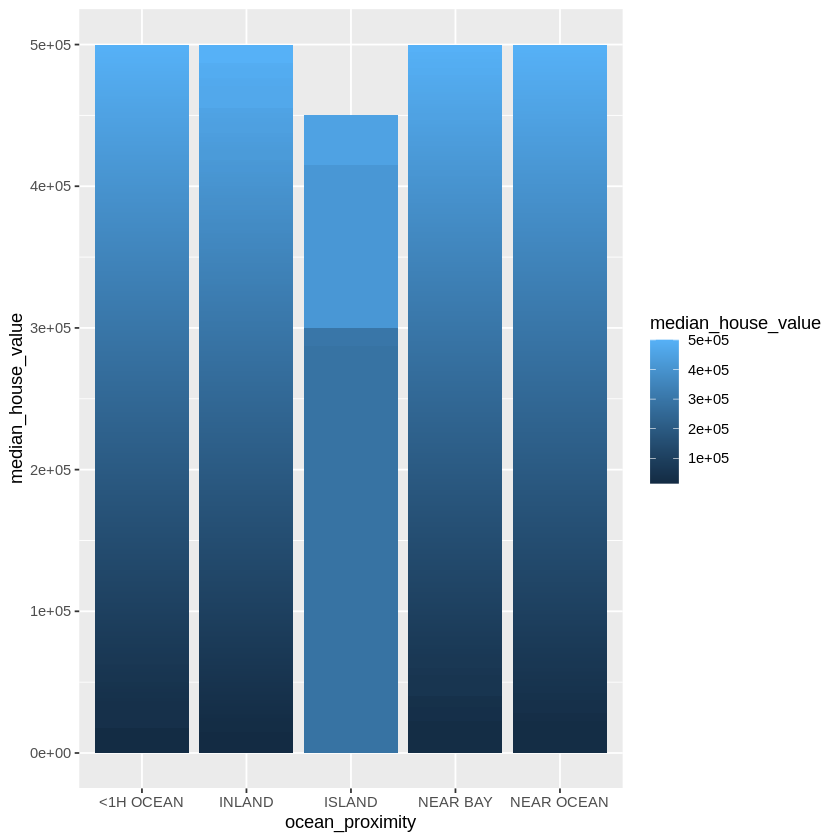

In [5]:
data1 <- data %>%
    arrange(desc(median_house_value))
nearness_to_bay_plot <- ggplot(data1, aes(x=ocean_proximity,y=median_house_value,fill = median_house_value)) +
    geom_bar(stat="identity",position = "dodge") 
nearness_to_bay_plot

$breaks
 [1]      0  50000 100000 150000 200000 250000 300000 350000 400000 450000
[11] 500000 550000

$counts
 [1]    9  334 1206 2531 1815 1142  727  443  244  153  532

$density
 [1] 1.970228e-08 7.311734e-07 2.640105e-06 5.540718e-06 3.973292e-06
 [6] 2.500000e-06 1.591506e-06 9.697898e-07 5.341506e-07 3.349387e-07
[11] 1.164623e-06

$mids
 [1]  25000  75000 125000 175000 225000 275000 325000 375000 425000 475000
[11] 525000

$xname
[1] "close_to_ocean$median_house_value"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

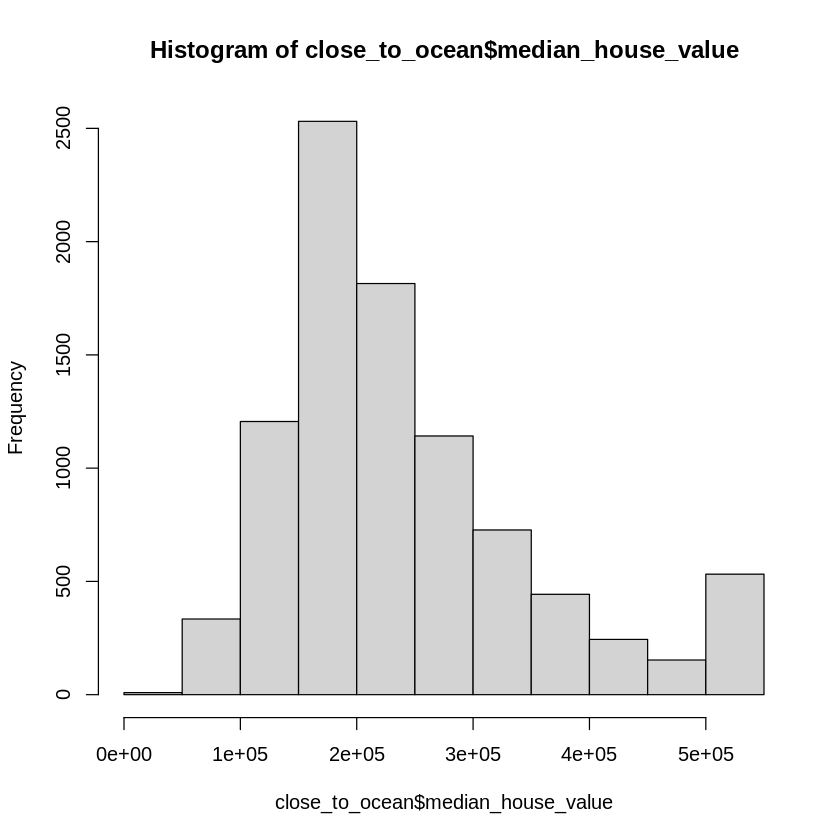

In [6]:
close_to_ocean <- filter(data, ocean_proximity == "<1H OCEAN")

close_to_ocean_plot <- hist(close_to_ocean$median_house_value)
close_to_ocean_plot